In [1]:
from IPython.display import display, Markdown, Math
import sympy as sp
import numpy as np
sp.init_printing()

Find the maxima of the following function

$$f(x,y)=x^4 −x^2y+y^2 −3y+4$$

### Step I

Defining variable and function.

```python
x, y = sp.var('x,y',real=True);
f = x**4 - x**2*y + y**2 - 3*y +4
f
```

In [16]:
x, y = sp.var('x,y',real=True);
f = x**4 - x**2*y + y**2 - 3*y +4
f

### Step II

Finding gradiant of the function. 

```python
gradf = [sp.diff(f,c) for c in [x,y]] # gradient of Lagrangian w.r.t. (x,y)
```

In [20]:
gradf = [sp.diff(f,c) for c in [x,y]] # gradient of Lagrangian w.r.t. (x,y)

for i in gradf:
    display(i)

### Step III

Finding the criticlal points by setting the gradient equal to $0$. Critical points is obtained using

```python
stationary_points = sp.solve(gradf, [x, y], dict=True) # solve the KKT equations
stationary_points 
```

In [5]:
stationary_points = sp.solve(gradf, [x, y], dict=True) # solve the KKT equations
stationary_points 

table = "|$x$|$y$|Obj|\n|---|---|---|\n"
for i in stationary_points:
    table += "|$" + sp.latex(i[x]) \
          + "$|$" + sp.latex(i[y]) \
          + "$|$" + sp.latex(f.subs(i)) \
          + "$|\n"

display(Markdown(table))

|$x$|$y$|Obj|
|---|---|---|
|$-1$|$2$|$1$|
|$0$|$\frac{3}{2}$|$\frac{7}{4}$|
|$1$|$2$|$1$|


### Step IV

Computing the sign of the Hessian at each of the critical points. The Hessian is computed as

```python
H = sp.hessian(f, (x,y))
H
```

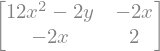

In [22]:
H = sp.hessian(f, (x,y))
H

The Eigenvalues of Hessina Matrix will determine weather a point is maxima or minima

```python
def sign(A):
    d = A.eigenvals().keys()
    if any(x >= 0 for x in d):
        if any(x <= 0 for x in d):
            return "None"
        else:
            return "Minima"
    else:
        return "Maxima"
```

In [7]:
def sign(A):
    d = A.eigenvals().keys()
    if any(x >= 0 for x in d):
        if any(x <= 0 for x in d):
            return "None"
        else:
            return "Minima"
    else:
        return "Maxima"

In [23]:
table = "|$x$|$y$|Obj|Hessian|\n" \
       +"|---|---|---|------|\n"
for i in stationary_points:
    table += "|$" + sp.latex(i[x]) + "$|$" \
                  + sp.latex(i[y]) + "$|$" \
                  + sp.latex(f.subs(i)) + "$|" \
                  + sign(H.subs(i)) + "|\n"

display(Markdown(table))

|$x$|$y$|Obj|Hessian|
|---|---|---|------|
|$-1$|$2$|$1$|Minima|
|$0$|$\frac{3}{2}$|$\frac{7}{4}$|None|
|$1$|$2$|$1$|Minima|


**Conclusion:** The points $(-1,2)$ and $(1,2)$ are the local minima(which is also global) of the given function.